In [1]:
!pip install -q torchmetrics -U mlxtend
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download = True,
                                   transform = ToTensor())
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor())

In [3]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


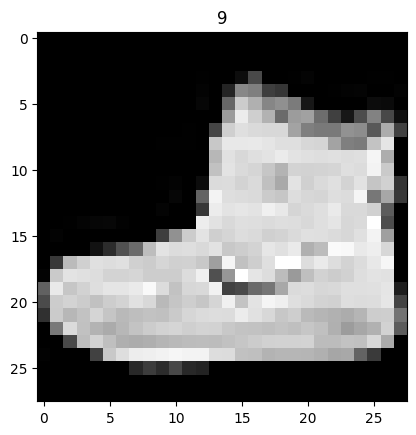

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label);

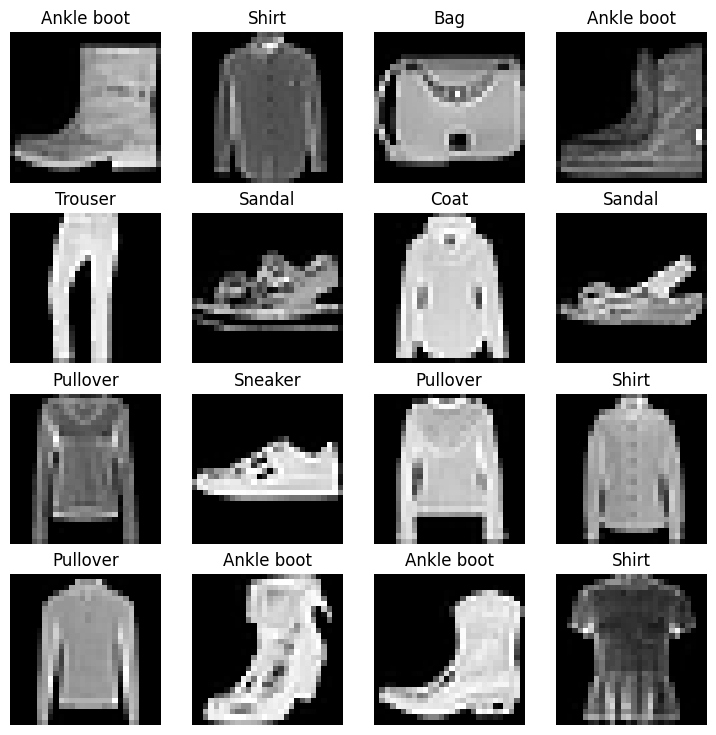

In [7]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# prepare data loader

In [8]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f29637f3560>, <torch.utils.data.dataloader.DataLoader object at 0x7f2963d57ce0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [9]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

ukuran gambar: torch.Size([1, 28, 28])
label gambar: 6, ukuran label: torch.Size([])


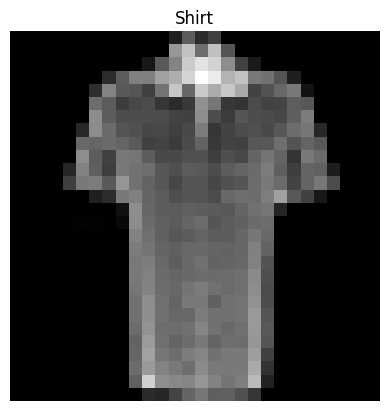

In [10]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"ukuran gambar: {img.shape}")
print(f"label gambar: {label}, ukuran label: {label.shape}")

In [11]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"panjang sebelum flatten: {x.shape}")
print(f"panjang setelah flatten: {output.shape}")

panjang sebelum flatten: torch.Size([1, 28, 28])
panjang setelah flatten: torch.Size([1, 784])


In [12]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self,x):
      return self.layer_stack(x)

In [13]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [15]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [ ]:
from torch.nn.modules import loss
from helper_functions import accuracy_fn # mengimpor fungsi akurasi dari helper_functions.py
loss_fn = nn.CrossEntropyLoss()
optimezer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

# membuat fungsi waktu estimasi runningnya

In [17]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device =None):
  total_waktu = end - start
  print(f"waktu latih {device}: {total_waktu:.3f} detik")
  return total_waktu

In [18]:
waktu_mulai = timer()
end_time = timer()
print_train_time(start= waktu_mulai, end = end_time, device="cpu")

waktu latih cpu: 0.000 detik


4.762799972013454e-05

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_cpu = timer()

# 1. Setup Early Stopping Parameters
patience = 3             # Berapa epoch kita sabar menunggu perbaikan
min_delta = 0.001        # Perbaikan minimum agar dianggap "membaik"
best_test_loss = float('inf')
counter = 0              # Penghitung berapa kali model gagal membaik
early_stop = False

# Meyiapkan list kosong untuk metrik
train_loss_list_0, test_loss_list_0 = [], []
train_acc_list_0, test_acc_list_0 = [], []

epochs = 50

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n---------")
    train_loss, train_acc = 0, 0

    #Training
    model_0.train()
    for batch, (x, y) in enumerate(train_dataloader):
        y_pred = model_0(x)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimezer.zero_grad()
        loss.backward()
        optimezer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    train_loss_list_0.append(train_loss)
    train_acc_list_0.append(train_acc)

    #Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test).item()
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        test_loss_list_0.append(test_loss)
        test_acc_list_0.append(test_acc)

    print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

    #Early Stopping
    if test_loss < best_test_loss - min_delta:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        print(f"EarlyStopping counter: {counter} out of {patience}")
        if counter >= patience:
            print("--- Early stopping dipicu! Menghentikan latihan. ---")
            break

#timer
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_cpu, end=train_time_end,
                 device=str(next(model_0.parameters()).device))

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0
---------
Train loss: 0.4179 | Test loss: 0.4539, Test acc: 84.18%
epoch: 1
---------
Train loss: 0.4161 | Test loss: 0.4560, Test acc: 84.24%
EarlyStopping counter: 1 out of 3
epoch: 2
---------
Train loss: 0.4132 | Test loss: 0.4606, Test acc: 84.20%
EarlyStopping counter: 2 out of 3
epoch: 3
---------
Train loss: 0.4104 | Test loss: 0.4555, Test acc: 83.80%
EarlyStopping counter: 3 out of 3
--- Early stopping dipicu! Menghentikan latihan. ---
waktu latih cpu: 36.584 detik


# Membuat fungsi evaluasi pada model

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """Mengembalikan sebuah dictionary containing dari hasil model yang telah di prediksi oleh dataloader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #membuat prediksi
      y_pred = model(X)
      #menghitung fungsi kehilangan dan nilai accuraci per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      #scale loss dan accuracy untuk mencari rata2 loss/rerata per batch
    loss /=len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47133371233940125,
 'model_acc': 83.4564696485623}

In [22]:
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [23]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [24]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=64,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#6 set up loss,optimezer and evaluasi metrics

In [25]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Hitung kerugian
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer langkah nya(update parameter dari model setiap batch)
        optimizer.step()

    # Membagi total kerugian dari data latih dan panjang accuraci dari data latih loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
    return test_loss, test_acc

In [ ]:
torch.manual_seed(42)


from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 50
patience = 3
counter =0
best_loss = float('inf')

#Buat sebuah optimisasi dan menggunakan perulangan evaluasi langkah data train dan test
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_loss, train_acc = train_step(model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device = device
               )
    test_loss, test_acc = test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0 # Reset counter karena model membaik
        print(f"Model membaik! Menyimpan best_loss: {best_loss:.5f}")
    else:
        counter += 1
        print(f"Model tidak membaik. Counter: {counter}/{patience}")

    if counter >= patience:
        print(f"\n Early Stopping dipicu pada epoch {epoch}. Latihan dihentikan!")
        break

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.63198 | Train accuracy: 78.43%
Test loss: 0.46312 | Test accuracy: 83.20%

Model membaik! Menyimpan best_loss: 0.46312
Epoch: 1
---------
Train loss: 0.42221 | Train accuracy: 84.73%
Test loss: 0.42125 | Test accuracy: 85.06%

Model membaik! Menyimpan best_loss: 0.42125
Epoch: 2
---------
Train loss: 0.38132 | Train accuracy: 86.08%
Test loss: 0.39903 | Test accuracy: 85.49%

Model membaik! Menyimpan best_loss: 0.39903
Epoch: 3
---------
Train loss: 0.35567 | Train accuracy: 86.88%
Test loss: 0.38195 | Test accuracy: 85.97%

Model membaik! Menyimpan best_loss: 0.38195
Epoch: 4
---------
Train loss: 0.33752 | Train accuracy: 87.68%
Test loss: 0.37770 | Test accuracy: 86.59%

Model membaik! Menyimpan best_loss: 0.37770
Epoch: 5
---------
Train loss: 0.32286 | Train accuracy: 88.15%
Test loss: 0.37423 | Test accuracy: 86.61%

Model membaik! Menyimpan best_loss: 0.37423
Epoch: 6
---------
Train loss: 0.30918 | Train accuracy: 88.58%
Test loss: 0.36100 | Tes

In [28]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  """Mengembalikan sebuah dictionary containing dari hasil model yang telah di prediksi oleh dataloader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Membuat data kami device agnostic
      X,y = X.to(device),y.to(device)
      #membuat prediksi
      y_pred = model(X)
      #menghitung fungsi kehilangan dan nilai accuraci per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      #scale loss dan accuraci untuk mencari rata2 loss/rerata per batch
    loss /=len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [29]:
#Dapatkan evaluasi dari model 1
model_1_results = eval_model(
    model=model_1,
    data_loader =test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.3501994013786316,
 'model_acc': 87.66972843450479}

In [30]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47133371233940125,
 'model_acc': 83.4564696485623}

## Model 2 : Membuat sebauh convulitional Neural Network (CNN)

In [31]:
class FashionMnistModelV2(nn.Module):
  """
  Arsitektur model dengan replace dari TinyVgg
  Dari website model cnn explainer
  """
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [32]:
torch.manual_seed(42)
model_2 = FashionMnistModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMnistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [33]:
torch.manual_seed(42)

#Buat sebuah batch dari gambar
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Singgle batch shape: {test_image.shape}")
print(f"test image:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Singgle batch shape: torch.Size([3, 64, 64])
test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 

In [34]:
torch.manual_seed(42)
# membuat sebuah lapisan convulution dengan dimensi yang sama seperti TinyVGG

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride = 1,
                       padding =0)
conv_layer(test_image)

tensor([[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
         [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
         [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
         ...,
         [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
         [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
         [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

        [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
         [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
         [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
         ...,
         [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
         [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
         [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

        [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
         [-0.0979,  0.1598,  0.1165,  ..., -0

In [35]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [36]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [37]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [38]:
# Set up loos dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [39]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set up epoch
epochs = 50
patience = 3
counter =0
best_loss = float('inf')

#Buat sebuah optimisasi dan menggunakan perulangan evaluasi langkah data train dan test
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_loss, train_acc = train_step(model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device = device
               )
    test_loss, test_acc = test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0 # Reset counter karena model membaik
        print(f"Model membaik! Menyimpan best_loss: {best_loss:.5f}")
    else:
        counter += 1
        print(f"Model tidak membaik. Counter: {counter}/{patience}")

    if counter >= patience:
        print(f"\n Early Stopping dipicu pada epoch {epoch}. Latihan dihentikan!")
        break

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59468 | Train accuracy: 78.42%
Test loss: 0.39628 | Test accuracy: 86.01%

Model membaik! Menyimpan best_loss: 0.39628
Epoch: 1
---------
Train loss: 0.36212 | Train accuracy: 86.88%
Test loss: 0.34783 | Test accuracy: 86.99%

Model membaik! Menyimpan best_loss: 0.34783
Epoch: 2
---------
Train loss: 0.32444 | Train accuracy: 88.21%
Test loss: 0.31838 | Test accuracy: 88.28%

Model membaik! Menyimpan best_loss: 0.31838
Epoch: 3
---------
Train loss: 0.30395 | Train accuracy: 88.97%
Test loss: 0.32210 | Test accuracy: 88.19%

Model tidak membaik. Counter: 1/3
Epoch: 4
---------
Train loss: 0.28887 | Train accuracy: 89.49%
Test loss: 0.30269 | Test accuracy: 88.92%

Model membaik! Menyimpan best_loss: 0.30269
Epoch: 5
---------
Train loss: 0.27797 | Train accuracy: 89.90%
Test loss: 0.31541 | Test accuracy: 88.56%

Model tidak membaik. Counter: 1/3
Epoch: 6
---------
Train loss: 0.26980 | Train accuracy: 90.07%
Test loss: 0.30546 | Test accuracy: 88.97%



In [40]:
# Lihat hasil model yang telah di latih
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistModelV2',
 'model_loss': 0.30056315660476685,
 'model_acc': 89.04752396166134}

In [41]:
# Bandingkan hasil model yang telah di latih
import pandas as pd
compare_result = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_result

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.471334,83.456470
1,FashionMNISTModelV1,0.350199,87.669728
2,FashionMnistModelV2,0.300563,89.047524


In [47]:
# Kita juga bisa melihat waktu hasil belajar dari model
import pandas as pd
compare_result = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_result['training_time'] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_result

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.471334,83.456470,36.583965
1,FashionMNISTModelV1,0.350199,87.669728,128.009305
2,FashionMnistModelV2,0.300563,89.047524,200.235917


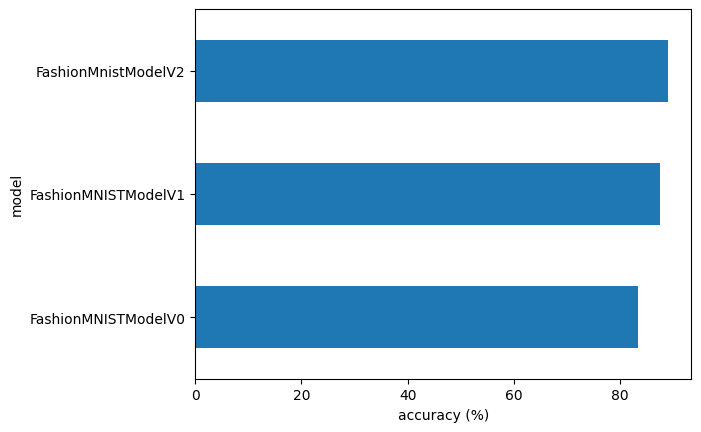

In [48]:
#Buat grafik dari hasil model
import matplotlib.pyplot as plt
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [49]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [50]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

pred_probs[:2]

tensor([[8.7687e-09, 4.2323e-09, 3.4197e-09, 1.0560e-11, 1.8566e-11, 9.9997e-01,
         6.6292e-08, 1.4787e-05, 1.9250e-06, 1.2914e-05],
        [1.6112e-02, 7.6384e-01, 5.4202e-04, 1.4213e-01, 5.9235e-03, 1.4042e-05,
         7.1160e-02, 6.3833e-06, 2.6980e-04, 3.2348e-06]])

In [ ]:
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

pred_probs[:2]

tensor([[8.7687e-09, 4.2323e-09, 3.4197e-09, 1.0560e-11, 1.8566e-11, 9.9997e-01,
         6.6292e-08, 1.4787e-05, 1.9250e-06, 1.2914e-05],
        [1.6112e-02, 7.6384e-01, 5.4202e-04, 1.4213e-01, 5.9235e-03, 1.4042e-05,
         7.1160e-02, 6.3833e-06, 2.6980e-04, 3.2348e-06]])

In [53]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

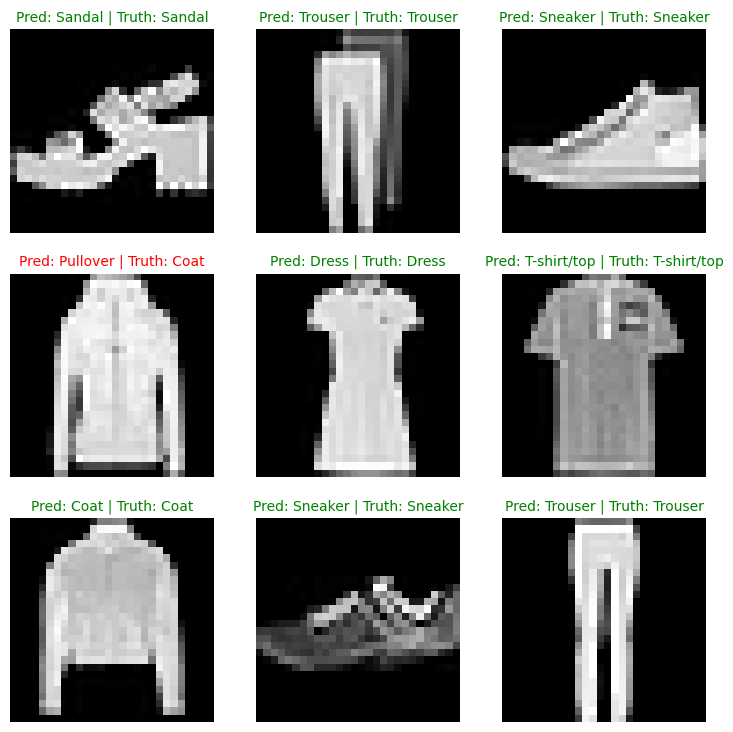

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # text hijau berarti benar
  else:
      plt.title(title_text, fontsize=10, c="r") # text merah berarti salah
  plt.axis(False);

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [56]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.24.0


In [57]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.24.0


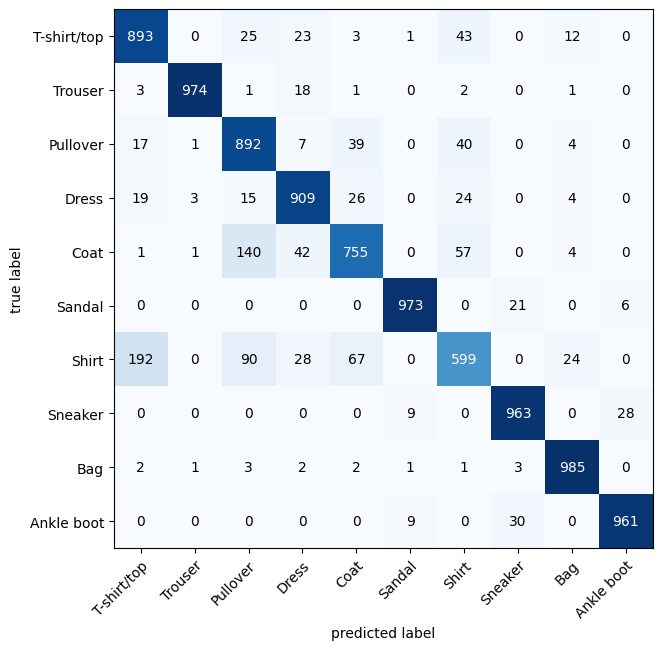

In [58]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);